In [1]:
import dataframe_image as dfi
import matplotlib.pyplot as plt
import mlrose_hiive
import mlrose
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.metrics import accuracy_score
from sklearn.model_selection import (GridSearchCV, train_test_split, validation_curve)   
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
np.random.seed(42)

Running Experiments for Four Peaks Problem

Running Random Hill Climb Experiment
Time (s): 0.19205403327941895

Running Simulated Annealing Experiment
Time (s): 0.0042917728424072266

Running Genetic Algorithm Experiment
Time (s): 3.336151123046875

Running MIMIC Algorithm Experiment
Time (s): 513.1785368919373



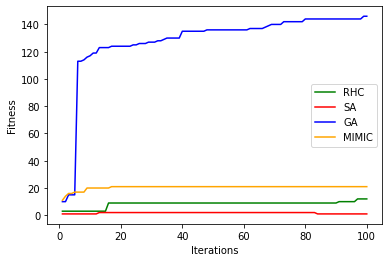

In [2]:
print("Running Experiments for Four Peaks Problem")
print()

# Define Fitness function and discrete problem object
fitness = mlrose_hiive.FourPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

max_attempts = 100
max_iters = 100

# RHC
print("Running Random Hill Climb Experiment")
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                     max_attempts = max_attempts, 
                                                                                     max_iters=max_iters, 
                                                                                     curve=True, 
                                                                                     random_state=42,
                                                                                    restarts=100)
end_time = time.time()
rhc_time = end_time - start_time
print("Time (s): {}".format(rhc_time))
print()

# SA
print("Running Simulated Annealing Experiment")
start_time = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=0.1, min_temp=1))
end_time = time.time()
sa_time = end_time - start_time
print("Time (s): {}".format(sa_time))
print()

# GA
print("Running Genetic Algorithm Experiment")
start_time = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    pop_size=200,
                                                    mutation_prob=0.2)
end_time = time.time()
ga_time = end_time - start_time
print("Time (s): {}".format(ga_time))
print()

# MIMIC
print("Running MIMIC Algorithm Experiment")
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                            problem, 
                                                            max_attempts = 100, 
                                                            max_iters = 100,  
                                                            curve = True, 
                                                            random_state = 42,
                                                            keep_pct=0.25)
end_time = time.time()
mimic_time = end_time - start_time
print("Time (s): {}".format(mimic_time))
print()

# Plot Iterations vs Fitness
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_fitness_curve, label='RHC', color='green')
plt.plot(iterations, sa_fitness_curve, label='SA', color='red')
plt.plot(iterations, ga_fitness_curve, label='GA', color='blue')
plt.plot(iterations, mimic_fitness_curve, label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.savefig("results/fourpeaks_fitness.png")

# Plot Time Table
# https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
dfi.export(df,"results/fourpeaks_times.png")


Running Experiments for Continuous Peaks Problem

Running Random Hill Climb Experiment
Time (s): 0.8648078441619873

Running Simulated Annealing Experiment
Time (s): 0.017363786697387695

Running Genetic Algorithm Experiment
Time (s): 3.155219078063965

Running MIMIC Algorithm Experiment
Time (s): 497.34607100486755



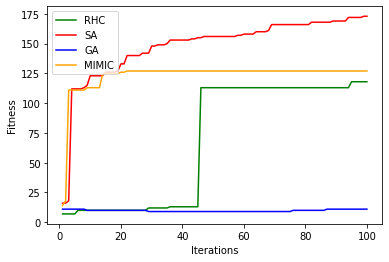

In [3]:
print("Running Experiments for Continuous Peaks Problem")
print()

# Define Fitness function and discrete problem object
fitness = mlrose_hiive.ContinuousPeaks()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

max_attempts = 100
max_iters = 100

# RHC
print("Running Random Hill Climb Experiment")
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                     max_attempts = max_attempts, 
                                                                                     max_iters=max_iters, 
                                                                                     curve=True, 
                                                                                     random_state=42,
                                                                                    restarts=100)
end_time = time.time()
rhc_time = end_time - start_time
print("Time (s): {}".format(rhc_time))
print()

# SA
print("Running Simulated Annealing Experiment")
start_time = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=0.1, min_temp=1))
end_time = time.time()
sa_time = end_time - start_time
print("Time (s): {}".format(sa_time))
print()

# GA
print("Running Genetic Algorithm Experiment")
start_time = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    pop_size=200,
                                                    mutation_prob=0.8)
end_time = time.time()
ga_time = end_time - start_time
print("Time (s): {}".format(ga_time))
print()

# MIMIC
print("Running MIMIC Algorithm Experiment")
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                            problem, 
                                                            max_attempts = 100, 
                                                            max_iters = 100,  
                                                            curve = True, 
                                                            random_state = 42,
                                                            keep_pct=0.25)
end_time = time.time()
mimic_time = end_time - start_time
print("Time (s): {}".format(mimic_time))
print()

# Plot Iterations vs Fitness
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_fitness_curve, label='RHC', color='green')
plt.plot(iterations, ga_fitness_curve, label='SA', color='red')
plt.plot(iterations, sa_fitness_curve, label='GA', color='blue')
plt.plot(iterations, mimic_fitness_curve, label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.savefig("results/continuouspeaks_fitness.png")

# Plot Time Table
# https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
dfi.export(df,"results/continuouspeaks_times.png")


Running Experiments for One Max Problem

Running Random Hill Climb Experiment
Time (s): 0.2798290252685547

Running Simulated Annealing Experiment
Time (s): 0.005660057067871094

Running Genetic Algorithm Experiment
Time (s): 0.9213471412658691

Running MIMIC Algorithm Experiment
Time (s): 505.1058487892151



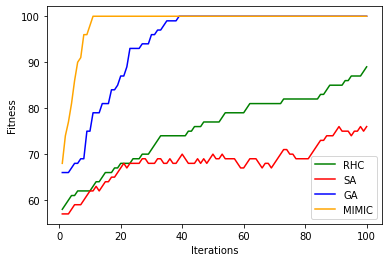

In [4]:
print("Running Experiments for One Max Problem")
print()

# Define Fitness function and discrete problem object
fitness = mlrose_hiive.OneMax()
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

max_attempts = 100
max_iters = 100

# RHC
print("Running Random Hill Climb Experiment")
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_fitness_curve = mlrose_hiive.random_hill_climb(problem, 
                                                                                     max_attempts = max_attempts, 
                                                                                     max_iters=max_iters, 
                                                                                     curve=True, 
                                                                                     random_state=42,
                                                                                    restarts=100)
end_time = time.time()
rhc_time = end_time - start_time
print("Time (s): {}".format(rhc_time))
print()

# SA
print("Running Simulated Annealing Experiment")
start_time = time.time()
sa_best_state, sa_best_fitness, sa_fitness_curve = mlrose_hiive.simulated_annealing(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    schedule=mlrose_hiive.GeomDecay(init_temp = 1, decay=0.1, min_temp=1))
end_time = time.time()
sa_time = end_time - start_time
print("Time (s): {}".format(sa_time))
print()

# GA
print("Running Genetic Algorithm Experiment")
start_time = time.time()
ga_best_state, ga_best_fitness, ga_fitness_curve = mlrose_hiive.genetic_alg(
                                                    problem, 
                                                    max_attempts=max_attempts, 
                                                    max_iters=max_iters, 
                                                    curve=True, 
                                                    random_state=42,
                                                    pop_size=100,
                                                    mutation_prob=0.2)
end_time = time.time()
ga_time = end_time - start_time
print("Time (s): {}".format(ga_time))
print()

# MIMIC
print("Running MIMIC Algorithm Experiment")
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_fitness_curve = mlrose_hiive.mimic(
                                                            problem, 
                                                            max_attempts = 100, 
                                                            max_iters = 100,  
                                                            curve = True, 
                                                            random_state = 42,
                                                            keep_pct=0.25)
end_time = time.time()
mimic_time = end_time - start_time
print("Time (s): {}".format(mimic_time))
print()

# Plot Iterations vs Fitness
iterations = range(1, max_iters + 1)
plt.plot(iterations, rhc_fitness_curve, label='RHC', color='green')
plt.plot(iterations, sa_fitness_curve, label='SA', color='red')
plt.plot(iterations, ga_fitness_curve, label='GA', color='blue')
plt.plot(iterations, mimic_fitness_curve, label='MIMIC', color='orange')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.savefig("results/onemax_fitness.png")

# Plot Time Table
# https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/
data = [('RHC', round(rhc_time, 5)), 
        ('SA', round(sa_time, 5)), 
        ('GA', round(ga_time, 5)), 
        ('MIMIC', round(mimic_time, 5))] 

df = pd.DataFrame(data, columns =['Algorithm', 'Time (s)']) 
dfi.export(df,"results/onemax_times.png")
